In [9]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import pymysql
from case_analysis.utils import sql_utils,plots_utils
from case_analysis.general import *


def simple_plot(df, xcol_name='date', metrics=None):
    fig, ax1 = plt.subplots()
    ax1.plot(df[xcol_name], df[metrics])
    ax1.set_xlabel(xcol_name, fontsize=20)
    ax1.set_ylabel(metrics, fontsize=20)

    plt.tick_params(axis='x', which='major', labelsize=15, labelrotation=45, length=10)

    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle(metrics, fontsize=16)
    plt.legend(metrics)
    plt.show()

## Definitions

In [10]:
ks = 5138
profile_id = 404
portfolio_id = 36
start_date = '2019-06-01'
end_date = '2019-11-11'
query_file_name = 'predicted_position.sql'
parse_list = ['date']

In [11]:
param_dict = {
    'ks_number':'KS' + str(sql_utils.get_ks_number(ks)),
    'portfolio_id': int(portfolio_id),
    'profile_id': int(profile_id),
    'start_date': start_date,
    'end_date': end_date
}
print(param_dict)

{'ks_number': 'KS5138', 'portfolio_id': 36, 'profile_id': 404, 'start_date': '2019-06-01', 'end_date': '2019-11-11'}


## Get data

In [12]:
conn = sql_utils.get_conn_ks(ks)
path = Path(os.getcwd()) 
query = sql_utils.load_query(query_file_name, query_dir=path.parent / 'queries')
performance_data = pd.read_sql(sql=query,con=conn,parse_dates=['date'],params=param_dict)

In [17]:
performance_data

,date,prominence_abs_imps,avg_pos_imps,predicted_pos_imps,prominence_abs_clicks,avg_pos_clicks,predicted_pos_clicks,bid2cpc
0,2019-11-11,0.910877,NaN,1.084823,0.954512,NaN,1.037903,4.567952
1,2019-11-10,0.920771,NaN,1.073773,0.953815,NaN,1.036907,4.398313
2,2019-11-09,0.931268,NaN,1.076965,0.957114,NaN,1.040702,4.575143
3,2019-11-08,0.938454,NaN,1.077211,0.958612,NaN,1.041686,4.287639
4,2019-11-07,0.940641,NaN,1.073072,0.960930,NaN,1.037747,4.521858
5,2019-11-06,0.948153,NaN,1.074270,0.966165,NaN,1.041621,4.460876
6,2019-11-05,0.947713,NaN,1.076368,0.966044,NaN,1.044957,4.650467
7,2019-11-04,0.945881,NaN,1.077721,0.960301,NaN,1.048310,4.540037
8,2019-11-03,0.943470,NaN,1.074735,0.961355,NaN,1.041367,4.607215
9,2019-11-02,0.945528,NaN,1.079208,0.963022,NaN,1.047528,4.558505


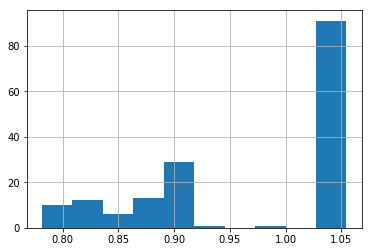

In [13]:
performance_data.predicted_pos_clicks.hist()

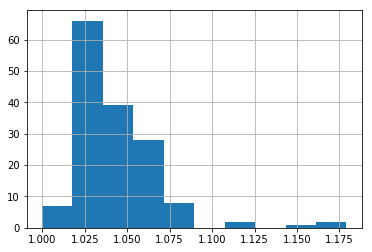

In [14]:
performance_data.avg_pos_clicks.hist()

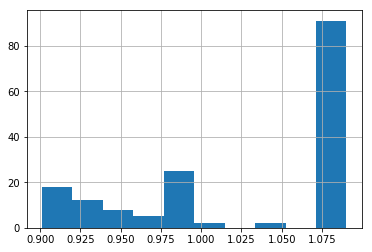

In [15]:
performance_data.predicted_pos_imps.hist()

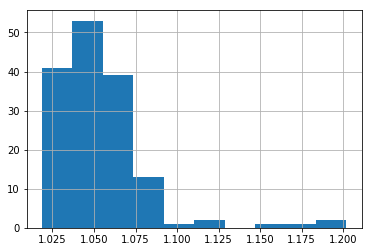

In [16]:
performance_data.avg_pos_imps.hist()